In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from quetzal.model import stepmodel
from quetzal.io import excel

In [62]:
import matplotlib.pyplot as plt
# Plot fonts
import matplotlib
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'arial'

# Choose zones for the scenarios

In [2]:
input_path = '../input_static/'
output_path = '../output/'
model_path = '../model/'

In [5]:
# Load scenario parameters
scenario = 'base'
params = excel.read_var(file='../input/parameters.xls', scenario=scenario)

In [6]:
sm = stepmodel.StepModel()

In [7]:
# Make sure to use the right zones
z = stepmodel.read_json(model_path + 'base' + '/' + 'de_zones')
#z.zones['FID'] = z.zones['NUTS_ID']
sm.zones = gpd.GeoDataFrame(z.zones)

In [9]:
# Add reactivate links and nodes to the network, if policy is set
# Load rail network reactivation links and nodes
reac_links = gpd.read_file(input_path + '/de_rail_reactivation/links.geojson')
reac_nodes = gpd.read_file(input_path + '/de_rail_reactivation/nodes.geojson')

# Adjust format to sm.links
reac_links.drop('index', axis=1, inplace=True)
reac_links.index = ['rs_reac_'+str(i) for i in range(len(reac_links))]
nodes_new_index = ['rs_reac_'+str(i) for i in range(len(reac_nodes))]
node_dict = dict(zip(reac_nodes['index'], nodes_new_index))
reac_links['a'] = reac_links['a'].map(node_dict)
reac_links['b'] = reac_links['b'].map(node_dict)
reac_nodes.index = nodes_new_index
reac_nodes['route_type'] = 'rail_short'
reac_links['route_id'] = reac_links['trip_id']

# zones
reac_nodes['zone'] = np.nan
for z, g in sm.zones['geometry'].items():
    reac_nodes.loc[reac_nodes['geometry'].within(g
    ), 'zone'] = z
reac_links['zone'] = reac_links['a'].map(reac_nodes['zone'])

print('Added {} rail short links due to reactivation'.format(len(reac_links)))

Added 974 rail short links due to reactivation


<Axes: >

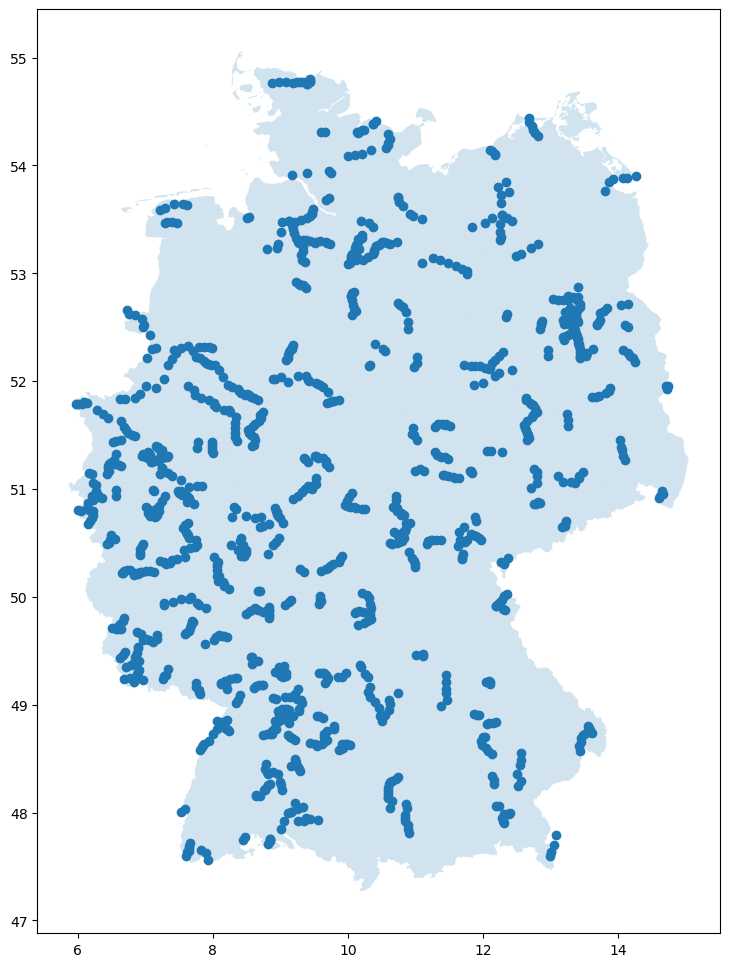

In [10]:
reac_nodes.plot(ax=sm.zones.plot(alpha=.2, figsize=(12,12)))

<Axes: >

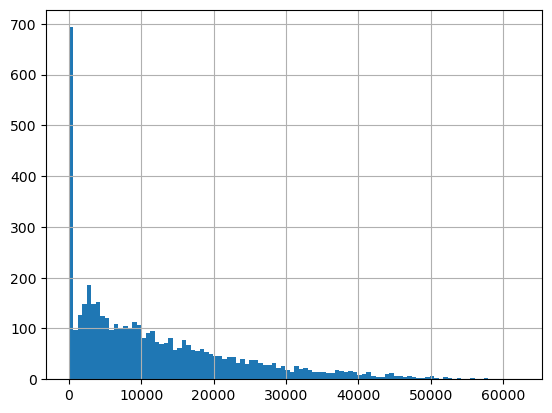

In [ ]:
sm.zones.to_crs(3035, inplace=True)
reac_nodes.to_crs(3035, inplace=True)
sm.zones['dist'] = gpd.sjoin_nearest(sm.zones, reac_nodes, how='left', distance_col='dist').groupby(level=0)['dist'].min()

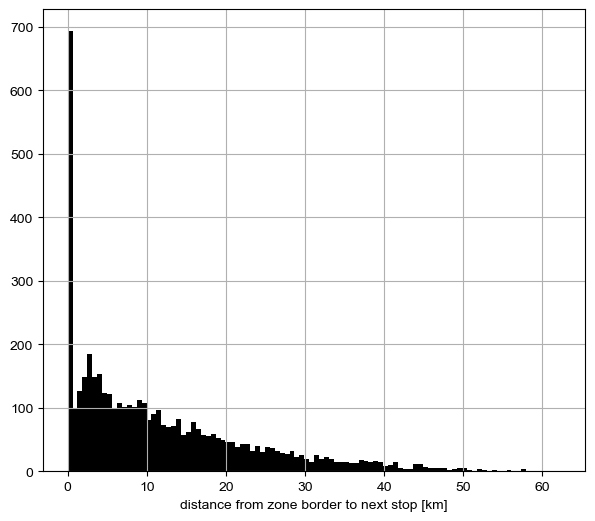

In [73]:
ax = (sm.zones['dist']/1000).hist(bins=100, color='black', figsize=(7,6))
ax.set_xlabel('distance from zone border to next stop [km]')
plt.savefig(output_path+'Reactivation/zone_distance_stops_hist.png', dpi=400)
plt.savefig(output_path+'Reactivation/zone_distance_stops_hist.eps')

In [74]:
len(sm.zones.loc[sm.zones['dist']<=0, 'geometry'])

622

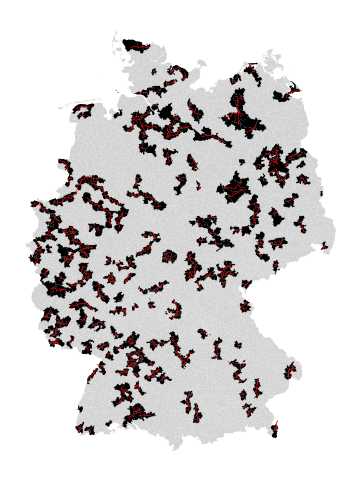

In [78]:
cutoff = 1000
plot_map = sm.zones.plot(color='lightgrey', figsize=(7,6))
sm.zones.loc[sm.zones['dist']<=cutoff, 'geometry'].plot(color='black', ax=plot_map)
reac_links.to_crs(3035).plot(color='red', linewidth=.5, ax=plot_map)
plot_map.axis('off')
plt.savefig(output_path+'Reactivation/zones_included.png', dpi=600)
plt.savefig(output_path+'Reactivation/zones_included.eps')

In [76]:
len(sm.zones.loc[sm.zones['dist']<=cutoff, 'geometry'])

747

In [77]:
';'.join(list(sm.zones.loc[sm.zones['dist']<=cutoff].index.astype(str)))

'10010000;10020000;10040000;10510011;10530032;10530100;10535323;10535358;10545489;10550028;10560048;10560049;10565690;10570001;10570008;10570091;10575727;10575755;10575782;10575785;10580034;10580135;10585833;10590183;10595952;10605005;10610113;10615138;10615179;10615189;20000000;31010000;31020000;31510040;31515402;31515406;31540019;31540028;31550003;31550013;31570008;32520001;32520005;32555408;32555409;32559502;32570028;32570031;32570035;32575401;32575404;32575405;33510004;33510006;33510026;33530040;33535401;33535402;33535405;33535406;33545406;33550001;33550009;33550022;33555401;33555405;33555406;33555407;33560007;33560011;33570008;33570016;33570039;33575403;33575404;33575405;33575406;33575408;33580002;33580024;33590038;33595402;33595406;33610003;33610005;33610012;34040000;34520001;34520019;34520023;34520027;34525403;34560001;34560015;34565401;34565402;34590004;34590005;34610007;34625401;40120000;51120000;51140000;51160000;51190000;51200000;51240000;51540024;51540036;51540040;51540048;